In [1]:
using CSV
using DataFrames
using LaTeXStrings
using Plots; pgfplotsx()
using Statistics

In [9]:
# un-comment and run this cell in order to import the raw data as downloaded from the cluster and aggregate in a single dataframe `df`
# df = DataFrame()
# for i in 1:100 # loop over job indices as set in the .sh file
#     append!(df, DataFrame(CSV.File("csv/nonsparse_scaling_vs_sparse_nonscaling" * lpad(i, 3, "0") * ".csv")))
# end
# df

In [10]:
# uncomment and run this cell in order to import the aggregated data
df = CSV.read("csv/nonsparse_scaling_vs_sparse_nonscaling.csv", DataFrame)

,filter,sparse_input,beta,dim,mse
,String,Bool,Float64,Int64,Float64
1,DiagSF,0,0.1,8,0.259187
2,DiagSF,1,0.1,8,0.262637
3,DiagSF,0,0.05,32,0.495484
4,DiagSF,0,0.0707107,16,0.358974
5,DiagSF,1,0.1,32,0.571977
6,DiagSF,0,0.0353553,64,0.561054
7,DiagSF,1,0.1,16,0.39774
8,DiagSF,1,0.1,64,0.803065
9,DiagSF,0,0.025,128,0.679076


In [11]:
# uncomment and run this cell in order to save the aggregated data
# CSV.write("csv/nonsparse_scaling_vs_sparse_nonscaling.csv", df)

In [15]:
# process data
df2 = groupby(df, [:filter, :sparse_input, :beta, :dim])
df3 = combine(df2, :mse => mean)
df4 = filter(row -> !isnan(row.mse_mean), df3)

,filter,sparse_input,beta,dim,mse_mean
,String,Bool,Float64,Int64,Float64
1,DiagSF,0,0.1,8,0.267315
2,DiagSF,1,0.1,8,0.26534
3,DiagSF,0,0.05,32,0.474224
4,DiagSF,0,0.0707107,16,0.363104
5,DiagSF,1,0.1,32,0.563537
6,DiagSF,0,0.0353553,64,0.5888
7,DiagSF,1,0.1,16,0.375113
8,DiagSF,1,0.1,64,0.785872
9,DiagSF,0,0.025,128,0.699601


In [16]:
# save processed data
CSV.write("csv/nonsparse_scaling_vs_sparse_nonscaling_processed.csv", df4)

"csv/nonsparse_scaling_vs_sparse_nonscaling_processed.csv"

In [17]:
dim_rng = [8 * 2^i for i in 0:8]

9-element Vector{Int64}:
    8
   16
   32
   64
  128
  256
  512
 1024
 2048

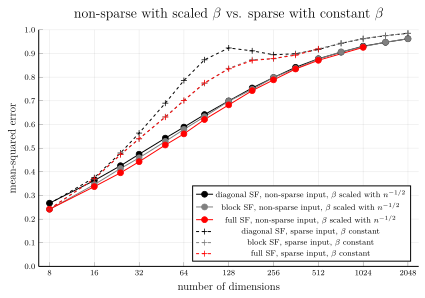

In [18]:
data = filter(row -> row.filter == "DiagSF" && row.sparse_input == false, df4)
sort!(data, order(:dim))
p = plot(
    data[:, :dim], data[:, :mse_mean], 
    label       = L"diagonal SF, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color       = "black",    
    markershape = :circle,
    legend      = :bottomright,
    xscale      = :log2,
    xticks      = dim_rng,
    xformatter  = x->Int(x),
    ylims       = (0, 1),
    yticks      = 0:0.1:1,
    xlabel      = "number of dimensions",
    ylabel      = "mean-squared error",
    title       = "non-sparse with scaled β vs. sparse with constant β"
)
data = filter(row -> row.filter == "BlockSF" && row.sparse_input == false, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = L"block SF, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color             = "gray", 
    markerstrokecolor = "gray",
    markershape       = :circle
)
data = filter(row -> row.filter == "FullSF" && row.sparse_input == false, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = L"full SF, non-sparse input, $\beta$ scaled with $n^{-1/2}$", 
    color             = "red",
    markerstrokecolor = "red",
    markershape       = :circle
)

data = filter(row -> row.filter == "DiagSF" && row.sparse_input == true, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "diagonal SF, sparse input, β constant", 
    color             = "black", 
    linestyle         = :dash,
    markershape       = :cross
)
data = filter(row -> row.filter == "BlockSF" && row.sparse_input == true, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "block SF, sparse input, β constant", 
    color             = "gray", 
    linestyle         = :dash,
    markershape       = :cross,
    markerstrokecolor = "gray",
)
data = filter(row -> row.filter == "FullSF" && row.sparse_input == true, df4)
sort!(data, order(:dim))
plot!(
    data[:, :dim], data[:, :mse_mean], 
    label             = "full SF, sparse input, β constant", 
    color             = "red",
    linestyle         = :dash,
    markerstrokecolor = "red",
    markershape       = :cross
)

In [122]:
# savefig("fig/nonsparse_scaling_vs_sparse_nonscaling.pdf")